# IMPORT PACKAGE

In [250]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from dateutil.relativedelta import relativedelta
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import random
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer 
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

sns.set()

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

# IMPORT DATA

In [3]:
hotel = pd.read_csv("Data.csv")
hotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [4]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [6]:
hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

### Convert month type: STR -> INT

In [7]:
hotel['arrival_date_month'] = hotel['arrival_date_month'].apply(datetime.strptime,args = ("%B",) )
hotel['arrival_date_month']

0        1900-07-01
1        1900-07-01
2        1900-07-01
3        1900-07-01
4        1900-07-01
            ...    
119385   1900-08-01
119386   1900-08-01
119387   1900-08-01
119388   1900-08-01
119389   1900-08-01
Name: arrival_date_month, Length: 119390, dtype: datetime64[ns]

In [8]:
hotel['arrival_date_month'] = hotel['arrival_date_month'].dt.month

In [9]:
hotel['arrival_date_month']

0         7
1         7
2         7
3         7
4         7
         ..
119385    8
119386    8
119387    8
119388    8
119389    8
Name: arrival_date_month, Length: 119390, dtype: int64

In [10]:
hotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,8,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,8,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,8,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,8,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


### Convert to full datetime

In [11]:
num=["arrival_date_year","arrival_date_month","arrival_date_day_of_month"]
hotel['arrival_date'] = hotel[num].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
hotel['arrival_date']=pd.to_datetime(hotel['arrival_date'])

In [12]:
hotel['arrival_date']

0        2015-07-01
1        2015-07-01
2        2015-07-01
3        2015-07-01
4        2015-07-01
            ...    
119385   2017-08-30
119386   2017-08-31
119387   2017-08-31
119388   2017-08-31
119389   2017-08-29
Name: arrival_date, Length: 119390, dtype: datetime64[ns]

### Subtracting date - month - year of reservation_status_date

In [13]:
hotel['reservation_status_date'].describe

<bound method NDFrame.describe of 0         2015-07-01
1         2015-07-01
2         2015-07-02
3         2015-07-02
4         2015-07-03
             ...    
119385    2017-09-06
119386    2017-09-07
119387    2017-09-07
119388    2017-09-07
119389    2017-09-07
Name: reservation_status_date, Length: 119390, dtype: object>

In [14]:
hotel['reservation_status_date'] = pd.to_datetime(hotel['reservation_status_date'], format = '%Y-%m-%d')
hotel['reservation_status_date']

0        2015-07-01
1        2015-07-01
2        2015-07-02
3        2015-07-02
4        2015-07-03
            ...    
119385   2017-09-06
119386   2017-09-07
119387   2017-09-07
119388   2017-09-07
119389   2017-09-07
Name: reservation_status_date, Length: 119390, dtype: datetime64[ns]

In [15]:
hotel['reservation_month'] = hotel['reservation_status_date'].dt.month
hotel['reservation_day'] = hotel['reservation_status_date'].dt.day
hotel['reservation_year'] = hotel['reservation_status_date'].dt.year

In [16]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  int64         
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

# Missing value



In [17]:
hotel.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### Remove the column "Company" because too much missing value

In [18]:
#hotel = hotel.loc[:, hotel.columns != "company"]
#hotel

### CHILDREN

In [19]:
hotel['children'].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [20]:
hotel['children'].describe()

count    119386.000000
mean          0.103890
std           0.398561
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          10.000000
Name: children, dtype: float64

In [21]:
children_mean = hotel['children'].mean()
children_mean

0.10388990333874994

In [22]:
children_mode = hotel['children'].mode()
children_mode

0    0.0
Name: children, dtype: float64

In [23]:
children_median = hotel['children'].median()
children_median

0.0

In [24]:
hotel["children"].replace(np.nan, children_median, inplace=True)
hotel['children'].unique()

array([ 0.,  1.,  2., 10.,  3.])

In [25]:
hotel['children']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
119385    0.0
119386    0.0
119387    0.0
119388    0.0
119389    0.0
Name: children, Length: 119390, dtype: float64

<AxesSubplot:ylabel='children'>

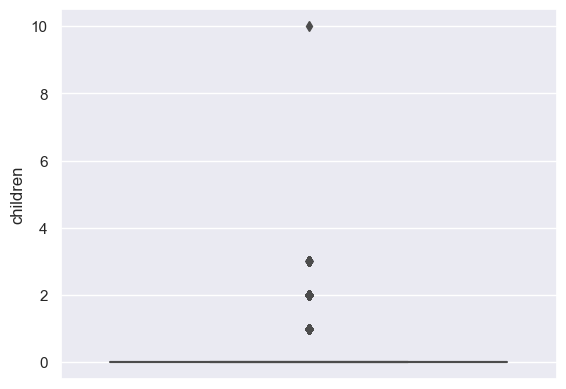

In [26]:
sns.boxplot(y = 'children',data = hotel)

### AGENT

In [27]:
hotel['agent'].value_counts()

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
289.0        1
432.0        1
265.0        1
93.0         1
304.0        1
Name: agent, Length: 333, dtype: int64

In [28]:
agent_mean = hotel['agent'].mean()
agent_mean

86.69338185346919

In [29]:
agent_mode = hotel['agent'].mode()
agent_mode

0    9.0
Name: agent, dtype: float64

In [30]:
agent_median = hotel['agent'].median()
agent_median

14.0

In [31]:
hotel['agent'] = hotel['agent'].fillna(agent_median)
hotel['agent'].unique()

array([ 14., 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

### COUNTRY

In [32]:
hotel['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [33]:
hotel['country'].describe()

count     118902
unique       177
top          PRT
freq       48590
Name: country, dtype: object

In [34]:
hotel['country'].fillna(method='ffill',inplace=True)
hotel['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'ETH', 

### COMPANY

In [35]:
#hotel['company'].describe()

In [36]:
#hotel['company'].value_counts()

In [37]:
#company_mean = hotel['company'].mean()
#company_mean

In [38]:
#company_mode = hotel['company'].mode()
#company_mode

In [39]:
#company_median = hotel['company'].median()
#company_median

In [40]:
hotel['company'].replace(np.nan, 0, inplace = True)
hotel['company'].unique()

array([  0., 110., 113., 270., 178., 240., 154., 144., 307., 268.,  59.,
       204., 312., 318.,  94., 174., 274., 195., 223., 317., 281., 118.,
        53., 286.,  12.,  47., 324., 342., 373., 371., 383.,  86.,  82.,
       218.,  88.,  31., 397., 392., 405., 331., 367.,  20.,  83., 416.,
        51., 395., 102.,  34.,  84., 360., 394., 457., 382., 461., 478.,
       386., 112., 486., 421.,   9., 308., 135., 224., 504., 269., 356.,
       498., 390., 513., 203., 263., 477., 521., 169., 515., 445., 337.,
       251., 428., 292., 388., 130., 250., 355., 254., 543., 531., 528.,
        62., 120.,  42.,  81., 116., 530., 103.,  39.,  16.,  92.,  61.,
       501., 165., 291., 290.,  43., 325., 192., 108., 200., 465., 287.,
       297., 490., 482., 207., 282., 437., 225., 329., 272.,  28.,  77.,
       338.,  72., 246., 319., 146., 159., 380., 323., 511., 407., 278.,
        80., 403., 399.,  14., 137., 343., 346., 347., 349., 289., 351.,
       353.,  54.,  99., 358., 361., 362., 366., 37

In [41]:
hotel['company'].value_counts()

0.0      112593
40.0        927
223.0       784
67.0        267
45.0        250
          ...  
32.0          1
11.0          1
487.0         1
101.0         1
376.0         1
Name: company, Length: 353, dtype: int64

# Outlier detection

### Children

In [42]:
hotel['children'].value_counts().sort_index()

0.0     110800
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [43]:
hotel['children'].describe()

count    119390.000000
mean          0.103886
std           0.398555
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          10.000000
Name: children, dtype: float64

In [44]:
hotel.loc[lambda df: df['children'] >3]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,reservation_month,reservation_day,reservation_year
328,Resort Hotel,1,55,2015,7,29,12,4,10,2,...,Contract,133.16,0,1,No-Show,2015-07-12,2015-07-12,7,12,2015


### Country

In [45]:
hotel['country'].value_counts()

PRT    48992
GBR    12158
FRA    10418
ESP     8574
DEU     7291
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [46]:
hotel['country'].describe()

count     119390
unique       177
top          PRT
freq       48992
Name: country, dtype: object

### Agent

In [47]:
hotel['agent'].describe()

count    119390.000000
mean         76.744392
std         105.904658
min           1.000000
25%           9.000000
50%          14.000000
75%         152.000000
max         535.000000
Name: agent, dtype: float64

In [48]:
hotel['agent'].value_counts().sort_index()

1.0      7191
2.0       162
3.0      1336
4.0        47
5.0       330
         ... 
510.0       2
526.0      10
527.0      35
531.0      68
535.0       3
Name: agent, Length: 333, dtype: int64

### Company

In [49]:
#hotel['company'].value_counts()

In [50]:
#hotel['company'].describe()

In [51]:
#hotel.loc[lambda df: df['company'] <9] #ID nên sẽ có sự chênh lệch-> không bất thường

### Required_car_parking_spaces

In [52]:
hotel['required_car_parking_spaces'].describe()

count    119390.000000
mean          0.062518
std           0.245291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: required_car_parking_spaces, dtype: float64

In [53]:
hotel.loc[lambda df: df['required_car_parking_spaces'] > 4] #unsual 2 adults but 8 car parking place

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,reservation_month,reservation_day,reservation_year
29045,Resort Hotel,0,26,2017,3,11,14,0,5,2,...,Transient-Party,40.0,8,1,Check-Out,2017-03-19,2017-03-14,3,19,2017
29046,Resort Hotel,0,138,2017,3,12,19,2,2,2,...,Transient-Party,80.0,8,0,Check-Out,2017-03-23,2017-03-19,3,23,2017


<AxesSubplot:ylabel='required_car_parking_spaces'>

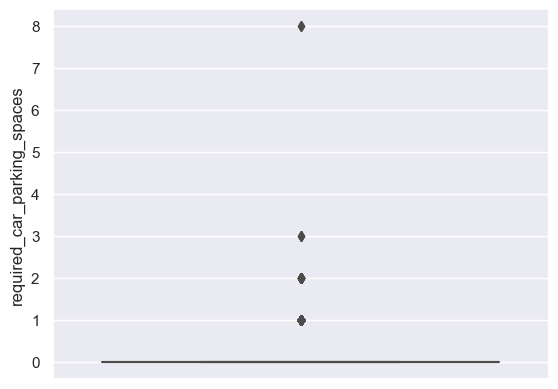

In [54]:
sns.boxplot(y = 'required_car_parking_spaces',data = hotel)

### Leadtime

In [55]:
hotel['lead_time'].describe()

count    119390.000000
mean        104.011416
std         106.863097
min           0.000000
25%          18.000000
50%          69.000000
75%         160.000000
max         737.000000
Name: lead_time, dtype: float64

In [56]:
hotel['lead_time'].unique()

array([342, 737,   7,  13,  14,   0,   9,  85,  75,  23,  35,  68,  18,
        37,  12,  72, 127,  78,  48,  60,  77,  99, 118,  95,  96,  69,
        45,  40,  15,  36,  43,  70,  16, 107,  47, 113,  90,  50,  93,
        76,   3,   1,  10,   5,  17,  51,  71,  63,  62, 101,   2,  81,
       368, 364, 324,  79,  21, 109, 102,   4,  98,  92,  26,  73, 115,
        86,  52,  29,  30,  33,  32,   8, 100,  44,  80,  97,  64,  39,
        34,  27,  82,  94, 110, 111,  84,  66, 104,  28, 258, 112,  65,
        67,  55,  88,  54, 292,  83, 105, 280, 394,  24, 103, 366, 249,
        22,  91,  11, 108, 106,  31,  87,  41, 304, 117,  59,  53,  58,
       116,  42, 321,  38,  56,  49, 317,   6,  57,  19,  25, 315, 123,
        46,  89,  61, 312, 299, 130,  74, 298, 119,  20, 286, 136, 129,
       124, 327, 131, 460, 140, 114, 139, 122, 137, 126, 120, 128, 135,
       150, 143, 151, 132, 125, 157, 147, 138, 156, 164, 346, 159, 160,
       161, 333, 381, 149, 154, 297, 163, 314, 155, 323, 340, 35

In [57]:
hotel.loc[lambda df: df['lead_time'] > 650]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,reservation_month,reservation_day,reservation_year
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,1,2015
4182,Resort Hotel,0,709,2016,2,9,25,8,20,2,...,Transient,68.0,0,0,Check-Out,2016-03-24,2016-02-25,3,24,2016


### Adr

In [58]:
hotel['adr'].describe()

count    119390.000000
mean        101.831122
std          50.535790
min          -6.380000
25%          69.290000
50%          94.575000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

In [59]:
hotel['adr'].value_counts()

62.00     3754
75.00     2715
90.00     2473
65.00     2418
0.00      1959
          ... 
89.43        1
63.07        1
55.69        1
49.51        1
157.71       1
Name: adr, Length: 8879, dtype: int64

In [60]:
hotel.loc[lambda df: df['adr'] < 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,reservation_month,reservation_day,reservation_year
14969,Resort Hotel,0,195,2017,3,10,5,4,6,2,...,Transient-Party,-6.38,0,0,Check-Out,2017-03-15,2017-03-05,3,15,2017


In [61]:
hotel.loc[lambda df: df['adr'] > 600]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,reservation_month,reservation_day,reservation_year
48515,City Hotel,1,35,2016,3,13,25,0,1,2,...,Transient,5400.0,0,0,Canceled,2016-02-19,2016-03-25,2,19,2016


<AxesSubplot:ylabel='adr'>

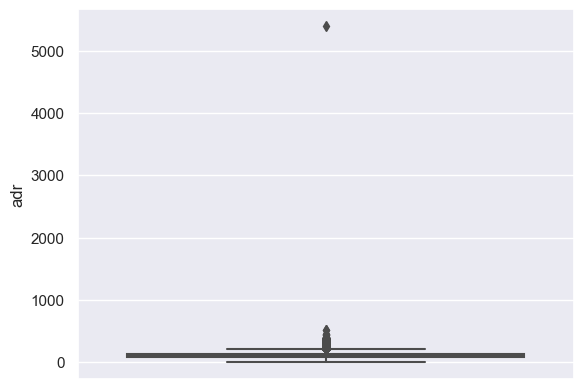

In [62]:
sns.boxplot( y= "adr", data = hotel)

In [63]:
hotel['booking_changes'].unique()

array([ 3,  4,  0,  1,  2,  5, 17,  6,  8,  7, 10, 16,  9, 13, 12, 20, 14,
       15, 11, 21, 18], dtype=int64)

In [64]:
hotel['booking_changes'].describe()

count    119390.000000
mean          0.221124
std           0.652306
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          21.000000
Name: booking_changes, dtype: float64

In [65]:
hotel['booking_changes'].value_counts().sort_index()

0     101314
1      12701
2       3805
3        927
4        376
5        118
6         63
7         31
8         17
9          8
10         6
11         2
12         2
13         5
14         5
15         3
16         2
17         2
18         1
20         1
21         1
Name: booking_changes, dtype: int64

### Babies

In [66]:
hotel['babies'].value_counts()

0     118473
1        900
2         15
10         1
9          1
Name: babies, dtype: int64

In [67]:
hotel.loc[lambda df: df['babies']>2] #bất thường

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,reservation_month,reservation_day,reservation_year
46619,City Hotel,0,37,2016,1,3,12,0,2,2,...,Transient,84.45,0,1,Check-Out,2016-01-14,2016-01-12,1,14,2016
78656,City Hotel,0,11,2015,10,42,11,2,1,1,...,Transient-Party,95.00,0,0,Check-Out,2015-10-14,2015-10-11,10,14,2015


In [68]:
hotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,reservation_month,reservation_day,reservation_year
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01,7,1,2015
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01,7,1,2015
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01,7,2,2015
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01,7,2,2015
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07-01,7,3,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,8,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,2017-08-30,9,6,2017
119386,City Hotel,0,102,2017,8,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,2017-08-31,9,7,2017
119387,City Hotel,0,34,2017,8,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,2017-08-31,9,7,2017
119388,City Hotel,0,109,2017,8,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,2017-08-31,9,7,2017


<AxesSubplot:ylabel='babies'>

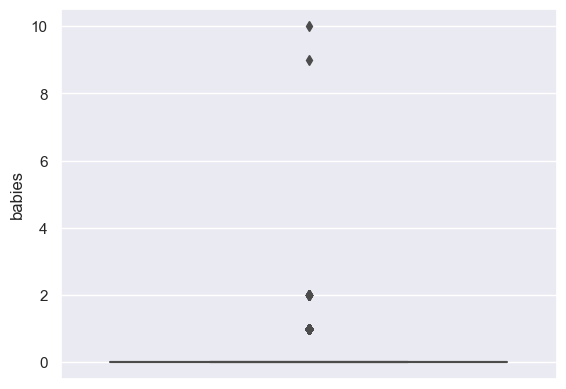

In [69]:
sns.boxplot(y = 'babies',data = hotel)

In [70]:
hotel['arrival_date_year'].value_counts()

2016    56707
2017    40687
2015    21996
Name: arrival_date_year, dtype: int64

### Reservation_status_date

In [71]:
hotel.loc[lambda s: s['reservation_year'] <2015]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,reservation_month,reservation_day,reservation_year
1545,Resort Hotel,1,297,2015,9,36,3,1,3,2,...,Transient,0.0,0,0,Canceled,2014-11-18,2015-09-03,11,18,2014
73714,City Hotel,1,265,2015,7,28,9,0,2,2,...,Transient-Party,62.8,0,0,Canceled,2014-10-17,2015-07-09,10,17,2014
73715,City Hotel,1,258,2015,7,27,2,0,2,2,...,Transient-Party,62.8,0,0,Canceled,2014-10-17,2015-07-02,10,17,2014
73716,City Hotel,1,258,2015,7,27,2,0,2,2,...,Transient-Party,62.8,0,0,Canceled,2014-10-17,2015-07-02,10,17,2014
73717,City Hotel,1,258,2015,7,27,2,0,2,2,...,Transient-Party,62.8,0,0,Canceled,2014-10-17,2015-07-02,10,17,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73890,City Hotel,1,321,2015,9,36,3,0,2,2,...,Transient-Party,62.8,0,0,Canceled,2014-10-17,2015-09-03,10,17,2014
73891,City Hotel,1,321,2015,9,36,3,0,2,2,...,Transient-Party,62.8,0,0,Canceled,2014-10-17,2015-09-03,10,17,2014
73892,City Hotel,1,321,2015,9,36,3,0,2,2,...,Transient-Party,62.8,0,0,Canceled,2014-10-17,2015-09-03,10,17,2014
73893,City Hotel,1,321,2015,9,36,3,0,2,2,...,Transient-Party,62.8,0,0,Canceled,2014-10-17,2015-09-03,10,17,2014


### Adding New Label - Check Validity: arrival datetime < reservation datetime

In [72]:
conditions = [
    (hotel['reservation_status'] == "Check-Out") & (hotel['arrival_date_year'] == hotel['reservation_year']) & (hotel['arrival_date_month'] <= hotel['reservation_month'])& (hotel['arrival_date_day_of_month'] < hotel['reservation_day'])
]  
letters = ['1']



In [73]:
hotel['Valid_Check_Out'] = np.select(conditions,letters)
hotel['Valid_Check_Out']

0         0
1         0
2         1
3         1
4         1
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: Valid_Check_Out, Length: 119390, dtype: object

In [74]:
hotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,reservation_month,reservation_day,reservation_year,Valid_Check_Out
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,0.00,0,0,Check-Out,2015-07-01,2015-07-01,7,1,2015,0
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,0.00,0,0,Check-Out,2015-07-01,2015-07-01,7,1,2015,0
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,75.00,0,0,Check-Out,2015-07-02,2015-07-01,7,2,2015,1
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,75.00,0,0,Check-Out,2015-07-02,2015-07-01,7,2,2015,1
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,98.00,0,1,Check-Out,2015-07-03,2015-07-01,7,3,2015,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,8,35,30,2,5,2,...,96.14,0,0,Check-Out,2017-09-06,2017-08-30,9,6,2017,0
119386,City Hotel,0,102,2017,8,35,31,2,5,3,...,225.43,0,2,Check-Out,2017-09-07,2017-08-31,9,7,2017,0
119387,City Hotel,0,34,2017,8,35,31,2,5,2,...,157.71,0,4,Check-Out,2017-09-07,2017-08-31,9,7,2017,0
119388,City Hotel,0,109,2017,8,35,31,2,5,2,...,104.40,0,0,Check-Out,2017-09-07,2017-08-31,9,7,2017,0


In [75]:
hotel['Valid_Check_Out'] = hotel['Valid_Check_Out'].astype(int)

In [76]:
hotel['Valid_Check_Out'].value_counts()

1    66273
0    53117
Name: Valid_Check_Out, dtype: int64

### Invalid_Checkout Label



In [77]:
condition = [
         (hotel['reservation_status'] == "Check-Out") & (hotel['Valid_Check_Out'] == 0)

]
letter = ['1']

In [78]:
hotel['InValid_Check_Out'] = np.select(condition,letter)

In [79]:
hotel['InValid_Check_Out'] = hotel['InValid_Check_Out'].astype(int)

In [80]:
hotel['InValid_Check_Out'].value_counts()

0    110497
1      8893
Name: InValid_Check_Out, dtype: int64

### Valid_Canceled Label

In [81]:
condition2 = [
     (hotel['reservation_status'] == "Canceled") & (hotel['arrival_date_year'] <= hotel['reservation_year']) & (hotel['arrival_date_month'] >= hotel['reservation_month'] & (hotel['arrival_date_day_of_month'] >= hotel['reservation_day'] )) 
]
letter2 = ['1']

In [82]:
hotel['Valid_Canceled'] = np.select(condition2,letter2)

In [83]:
hotel['Valid_Canceled'] = hotel['Valid_Canceled'].astype(int)

In [84]:
hotel['Valid_Canceled'].value_counts()

0    84436
1    34954
Name: Valid_Canceled, dtype: int64

### Invalid_Canceled Label

In [85]:
condition3 = [
    (hotel['reservation_status'] == 'Canceled') & (hotel['Valid_Canceled'] == 0)
]
letter3 = ['1']

In [86]:
hotel['Invalid_Canceled'] = np.select(condition3, letter3)

In [87]:
hotel['Invalid_Canceled'] = hotel['Invalid_Canceled'].astype(int)

In [88]:
hotel['Invalid_Canceled'].value_counts()

0    111327
1      8063
Name: Invalid_Canceled, dtype: int64

In [89]:
hotel.loc[lambda df : df['Invalid_Canceled'] == 1]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reservation_status,reservation_status_date,arrival_date,reservation_month,reservation_day,reservation_year,Valid_Check_Out,InValid_Check_Out,Valid_Canceled,Invalid_Canceled
1545,Resort Hotel,1,297,2015,9,36,3,1,3,2,...,Canceled,2014-11-18,2015-09-03,11,18,2014,0,0,0,1
3742,Resort Hotel,1,20,2016,1,1,1,0,2,2,...,Canceled,2015-12-22,2016-01-01,12,22,2015,0,0,0,1
3743,Resort Hotel,1,76,2016,1,1,1,1,2,2,...,Canceled,2015-12-20,2016-01-01,12,20,2015,0,0,0,1
3745,Resort Hotel,1,113,2016,1,1,2,0,1,2,...,Canceled,2015-11-16,2016-01-02,11,16,2015,0,0,0,1
3746,Resort Hotel,1,113,2016,1,1,2,0,1,2,...,Canceled,2015-11-16,2016-01-02,11,16,2015,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82405,City Hotel,1,23,2016,1,1,2,2,1,2,...,Canceled,2015-12-29,2016-01-02,12,29,2015,0,0,0,1
83092,City Hotel,1,189,2016,4,15,8,0,2,2,...,Canceled,2015-12-09,2016-04-08,12,9,2015,0,0,0,1
83093,City Hotel,1,190,2016,4,15,9,1,1,2,...,Canceled,2015-12-09,2016-04-09,12,9,2015,0,0,0,1
83094,City Hotel,1,191,2016,4,16,10,2,0,2,...,Canceled,2015-12-09,2016-04-10,12,9,2015,0,0,0,1


### Valid_No_Show Label

In [90]:
condition4 = [
    (hotel['reservation_status'] == 'No-Show') & (hotel['arrival_date_year'] == hotel['reservation_year']) & (hotel['arrival_date_month'] == hotel['reservation_month']) & (hotel['arrival_date_day_of_month'] == hotel['reservation_day'])
]
letter4 = ['1']

In [91]:
hotel['Valid_No_Show'] = np.select(condition4, letter4)
hotel['Valid_No_Show']

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: Valid_No_Show, Length: 119390, dtype: object

In [92]:
hotel['Valid_No_Show'] = hotel['Valid_No_Show'].astype(int)

In [93]:
hotel['Valid_No_Show'].value_counts()

0    118184
1      1206
Name: Valid_No_Show, dtype: int64

### Invalid_No_Show Label

In [94]:
condition6 =[
     (hotel['reservation_status'] == 'No-Show') & (hotel['arrival_date_year'] == hotel['reservation_year']) & (hotel['arrival_date_month'] != hotel['reservation_month']) & (hotel['arrival_date_day_of_month'] != hotel['reservation_day'])
]
letter6 = ['1']

In [95]:
hotel['Invalid_No_Show'] = np.select(condition6,letter6)

In [96]:
hotel['Invalid_No_Show'] = hotel['Invalid_No_Show'].astype(int)

In [97]:
hotel['Invalid_No_Show'].value_counts()

0    119389
1         1
Name: Invalid_No_Show, dtype: int64

In [98]:
hotel['reservation_status'].value_counts()

Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64

In [99]:
hotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,arrival_date,reservation_month,reservation_day,reservation_year,Valid_Check_Out,InValid_Check_Out,Valid_Canceled,Invalid_Canceled,Valid_No_Show,Invalid_No_Show
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,2015-07-01,7,1,2015,0,1,0,0,0,0
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,2015-07-01,7,1,2015,0,1,0,0,0,0
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,2015-07-01,7,2,2015,1,0,0,0,0,0
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,2015-07-01,7,2,2015,1,0,0,0,0,0
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,2015-07-01,7,3,2015,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,8,35,30,2,5,2,...,2017-08-30,9,6,2017,0,1,0,0,0,0
119386,City Hotel,0,102,2017,8,35,31,2,5,3,...,2017-08-31,9,7,2017,0,1,0,0,0,0
119387,City Hotel,0,34,2017,8,35,31,2,5,2,...,2017-08-31,9,7,2017,0,1,0,0,0,0
119388,City Hotel,0,109,2017,8,35,31,2,5,2,...,2017-08-31,9,7,2017,0,1,0,0,0,0


### Stays_in_weekend night

In [100]:
hotel['stays_in_weekend_nights'].describe()

count    119390.000000
mean          0.927599
std           0.998613
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          19.000000
Name: stays_in_weekend_nights, dtype: float64

In [101]:
hotel['stays_in_weekend_nights'].value_counts()

0     51998
2     33308
1     30626
4      1855
3      1259
6       153
5        79
8        60
7        19
9        11
10        7
12        5
13        3
16        3
14        2
18        1
19        1
Name: stays_in_weekend_nights, dtype: int64

In [102]:
hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arrival_date',
       'reservation_month', 'reservation_day', 'reservation_year',
       'Valid_Check_Out', 'InValid_Check_Out', 'Valid_Canceled',
       'Invalid_Canceled', 'Valid_No_Show', 'Invalid_No_Show'],
      dtype='object')

### Stays-in-week-night

In [103]:
hotel['stays_in_week_nights'].value_counts().sort_index()

0      7645
1     30310
2     33684
3     22258
4      9563
5     11077
6      1499
7      1029
8       656
9       231
10     1036
11       56
12       42
13       27
14       35
15       85
16       16
17        4
18        6
19       44
20       41
21       15
22        7
24        3
25        6
26        1
30        5
32        1
33        1
34        1
35        1
40        2
41        1
42        1
50        1
Name: stays_in_week_nights, dtype: int64

### Total_Number_Visitors

In [104]:
hotel['Total_Number_Visitors'] = hotel['adults'] + hotel['children']+ hotel['babies']
hotel['Total_Number_Visitors']= hotel['Total_Number_Visitors'].astype(int)

In [105]:
hotel['Total_Number_Visitors']

0         2
1         2
2         1
3         1
4         2
         ..
119385    2
119386    3
119387    2
119388    2
119389    2
Name: Total_Number_Visitors, Length: 119390, dtype: int32

### No.1


In [106]:
hotel['No.#'] = hotel.index + 1
hotel['No.#']

0              1
1              2
2              3
3              4
4              5
           ...  
119385    119386
119386    119387
119387    119388
119388    119389
119389    119390
Name: No.#, Length: 119390, dtype: int64

### Stays_night

In [107]:
series1 = pd.Series(hotel['stays_in_weekend_nights']) 
series2 = pd.Series(hotel['stays_in_week_nights'])

In [108]:
hotel['number_of_day_stays'] = series1 + series2
hotel['number_of_day_stays']

0         0
1         0
2         1
3         1
4         2
         ..
119385    7
119386    7
119387    7
119388    7
119389    9
Name: number_of_day_stays, Length: 119390, dtype: int64

### Final-Valid_Check_Out

In [109]:
hotel.loc[lambda s: s['number_of_day_stays'] > 30]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reservation_year,Valid_Check_Out,InValid_Check_Out,Valid_Canceled,Invalid_Canceled,Valid_No_Show,Invalid_No_Show,Total_Number_Visitors,No.#,number_of_day_stays
1655,Resort Hotel,0,30,2015,9,37,7,13,33,2,...,2015,1,0,0,0,0,0,2,1656,46
3820,Resort Hotel,1,122,2016,1,3,12,12,30,2,...,2015,0,0,0,1,0,0,2,3821,42
3850,Resort Hotel,0,214,2016,1,5,26,12,30,2,...,2016,0,1,0,0,0,0,2,3851,42
5344,Resort Hotel,1,13,2016,4,18,25,9,24,2,...,2016,0,0,1,0,0,0,2,5345,33
9839,Resort Hotel,1,322,2017,1,2,10,16,40,2,...,2016,0,0,0,1,0,0,2,9840,56
14037,Resort Hotel,0,113,2015,8,31,1,18,42,1,...,2015,1,0,0,0,0,0,1,14038,60
14038,Resort Hotel,0,126,2016,7,28,5,19,50,1,...,2016,1,0,0,0,0,0,1,14039,69
20835,Resort Hotel,0,92,2016,1,2,7,10,25,1,...,2016,1,0,0,0,0,0,1,20836,35
31404,Resort Hotel,0,148,2016,11,48,23,10,25,1,...,2016,1,0,0,0,0,0,1,31405,35
32589,Resort Hotel,0,1,2017,2,5,3,13,32,1,...,2017,1,0,0,0,0,0,1,32590,45


In [110]:
hotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reservation_year,Valid_Check_Out,InValid_Check_Out,Valid_Canceled,Invalid_Canceled,Valid_No_Show,Invalid_No_Show,Total_Number_Visitors,No.#,number_of_day_stays
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,2015,0,1,0,0,0,0,2,1,0
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,2015,0,1,0,0,0,0,2,2,0
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,2015,1,0,0,0,0,0,1,3,1
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,2015,1,0,0,0,0,0,1,4,1
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,2015,1,0,0,0,0,0,2,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,8,35,30,2,5,2,...,2017,0,1,0,0,0,0,2,119386,7
119386,City Hotel,0,102,2017,8,35,31,2,5,3,...,2017,0,1,0,0,0,0,3,119387,7
119387,City Hotel,0,34,2017,8,35,31,2,5,2,...,2017,0,1,0,0,0,0,2,119388,7
119388,City Hotel,0,109,2017,8,35,31,2,5,2,...,2017,0,1,0,0,0,0,2,119389,7


In [111]:
hotel['arrival_date_month'].describe

<bound method NDFrame.describe of 0         7
1         7
2         7
3         7
4         7
         ..
119385    8
119386    8
119387    8
119388    8
119389    8
Name: arrival_date_month, Length: 119390, dtype: int64>

In [112]:
month_28 = hotel['arrival_date_month'] * 28

In [113]:
condition7 = [
    (hotel['arrival_date_month'] == 2),
    (hotel['arrival_date_month'] == 4),
    (hotel['arrival_date_month'] == 6), 
    (hotel['arrival_date_month'] == 9),
    (hotel['arrival_date_month'] == 11),
    (hotel['arrival_date_month'] == 1),
    (hotel['arrival_date_month'] == 3),
    (hotel['arrival_date_month'] == 5),
    (hotel['arrival_date_month'] == 7),
    (hotel['arrival_date_month'] == 8),
    (hotel['arrival_date_month'] == 10),
    (hotel['arrival_date_month'] == 12)
]
letter7 = (hotel['arrival_date_month'] * 28, 
hotel['arrival_date_month'] * 30, 
hotel['arrival_date_month'] * 30,
hotel['arrival_date_month'] * 30,
hotel['arrival_date_month'] * 30,
hotel['arrival_date_month'] * 31,
hotel['arrival_date_month'] * 31,
hotel['arrival_date_month'] * 31,
hotel['arrival_date_month'] * 31,
hotel['arrival_date_month'] * 31,
hotel['arrival_date_month'] * 31,
hotel['arrival_date_month'] * 31)

In [114]:
hotel['number_day_in_month_of_arrival_date'] = np.select(condition7, letter7)
hotel['number_day_in_month_of_arrival_date'].value_counts()

248    13877
217    12661
155    11791
310    11160
120    11089
180    10939
270    10508
93      9794
56      8068
330     6794
372     6780
31      5929
Name: number_day_in_month_of_arrival_date, dtype: int64

In [115]:
condition8 = [
    (hotel['reservation_month'] == 2),
    (hotel['reservation_month'] == 4),
    (hotel['reservation_month'] == 6), 
    (hotel['reservation_month'] == 9),
    (hotel['reservation_month'] == 11),
    (hotel['reservation_month'] == 1),
    (hotel['reservation_month'] == 3),
    (hotel['reservation_month'] == 5),
    (hotel['reservation_month'] == 7),
    (hotel['reservation_month'] == 8),
    (hotel['reservation_month'] == 10),
    (hotel['reservation_month'] == 12)
]
letter8 = (hotel['reservation_month'] * 28, 
hotel['reservation_month'] * 30, 
hotel['reservation_month'] * 30,
hotel['reservation_month'] * 30,
hotel['reservation_month'] * 30,
hotel['reservation_month'] * 31,
hotel['reservation_month'] * 31,
hotel['reservation_month'] * 31,
hotel['reservation_month'] * 31,
hotel['reservation_month'] * 31,
hotel['reservation_month'] * 31,
hotel['reservation_month'] * 31)

In [116]:
hotel['number_day_in_month_of_reservation_date'] = np.select(condition7, letter7)
hotel['number_day_in_month_of_reservation_date'].value_counts()


248    13877
217    12661
155    11791
310    11160
120    11089
180    10939
270    10508
93      9794
56      8068
330     6794
372     6780
31      5929
Name: number_day_in_month_of_reservation_date, dtype: int64

In [117]:
hotel


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,InValid_Check_Out,Valid_Canceled,Invalid_Canceled,Valid_No_Show,Invalid_No_Show,Total_Number_Visitors,No.#,number_of_day_stays,number_day_in_month_of_arrival_date,number_day_in_month_of_reservation_date
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,1,0,0,0,0,2,1,0,217,217
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,1,0,0,0,0,2,2,0,217,217
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,0,0,0,0,0,1,3,1,217,217
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,0,0,0,0,0,1,4,1,217,217
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,0,0,0,0,0,2,5,2,217,217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,8,35,30,2,5,2,...,1,0,0,0,0,2,119386,7,248,248
119386,City Hotel,0,102,2017,8,35,31,2,5,3,...,1,0,0,0,0,3,119387,7,248,248
119387,City Hotel,0,34,2017,8,35,31,2,5,2,...,1,0,0,0,0,2,119388,7,248,248
119388,City Hotel,0,109,2017,8,35,31,2,5,2,...,1,0,0,0,0,2,119389,7,248,248


In [118]:
hotel['real_stay_days'] = (hotel['reservation_day'] + hotel['number_day_in_month_of_reservation_date']) - (hotel['arrival_date_day_of_month'] + hotel['number_day_in_month_of_arrival_date']) 
hotel['real_stay_days'].value_counts()

1     16280
2     15476
3     15181
4     10302
7      5475
      ...  
26      193
27      124
28      112
29       50
30       19
Name: real_stay_days, Length: 61, dtype: int64

In [119]:
condition8 =[
    (hotel['Valid_Check_Out'] == 1) & (hotel['real_stay_days'] == hotel['number_of_day_stays']) 
]
letter8 = ('1')


In [120]:
hotel['validity'] = np.select(condition8, letter8)
hotel['validity'].value_counts()

1    66258
0    53132
Name: validity, dtype: int64

In [121]:
hotel['validity'] = hotel['validity'].astype(int)

In [122]:
hotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,Invalid_Canceled,Valid_No_Show,Invalid_No_Show,Total_Number_Visitors,No.#,number_of_day_stays,number_day_in_month_of_arrival_date,number_day_in_month_of_reservation_date,real_stay_days,validity
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,0,0,0,2,1,0,217,217,0,0
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,0,0,0,2,2,0,217,217,0,0
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,0,0,0,1,3,1,217,217,1,1
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,0,0,0,1,4,1,217,217,1,1
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,0,0,0,2,5,2,217,217,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,8,35,30,2,5,2,...,0,0,0,2,119386,7,248,248,-24,0
119386,City Hotel,0,102,2017,8,35,31,2,5,3,...,0,0,0,3,119387,7,248,248,-24,0
119387,City Hotel,0,34,2017,8,35,31,2,5,2,...,0,0,0,2,119388,7,248,248,-24,0
119388,City Hotel,0,109,2017,8,35,31,2,5,2,...,0,0,0,2,119389,7,248,248,-24,0


### Number of adults compare to the require car parking spaces

In [123]:
x = hotel['required_car_parking_spaces'] >= 0 
hotel.loc[x,['required_car_parking_spaces','adults']]

,required_car_parking_spaces,adults
0,0,2
1,0,2
2,0,1
3,0,1
4,0,2
...,...,...
119385,0,2
119386,0,3
119387,0,2
119388,0,2


In [124]:
hotel.loc[lambda df: df['required_car_parking_spaces'] <= hotel['adults']]


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,Invalid_Canceled,Valid_No_Show,Invalid_No_Show,Total_Number_Visitors,No.#,number_of_day_stays,number_day_in_month_of_arrival_date,number_day_in_month_of_reservation_date,real_stay_days,validity
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,0,0,0,2,1,0,217,217,0,0
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,0,0,0,2,2,0,217,217,0,0
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,0,0,0,1,3,1,217,217,1,1
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,0,0,0,1,4,1,217,217,1,1
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,0,0,0,2,5,2,217,217,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,8,35,30,2,5,2,...,0,0,0,2,119386,7,248,248,-24,0
119386,City Hotel,0,102,2017,8,35,31,2,5,3,...,0,0,0,3,119387,7,248,248,-24,0
119387,City Hotel,0,34,2017,8,35,31,2,5,2,...,0,0,0,2,119388,7,248,248,-24,0
119388,City Hotel,0,109,2017,8,35,31,2,5,2,...,0,0,0,2,119389,7,248,248,-24,0


# Remove Outlier

In [125]:
hotel_new =(hotel
.loc[lambda df: df['children'] <3]
.loc[lambda df: df['required_car_parking_spaces'] < 8]
.loc[lambda df: df['lead_time'] < 650]
.loc[lambda df: df['adr'] <= 600]
.loc[lambda df: df['adr'] > 0]
.loc[lambda df: df['babies'] <= 2]
.loc[lambda df: df['Invalid_Canceled'] == 0]
.loc[lambda df: df['InValid_Check_Out'] == 0]
.loc[lambda df: df['Invalid_No_Show'] == 0]
)

In [126]:
hotel_new = hotel_new.loc[lambda df: df['required_car_parking_spaces'] <= hotel_new['adults']]
hotel_new

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,Invalid_Canceled,Valid_No_Show,Invalid_No_Show,Total_Number_Visitors,No.#,number_of_day_stays,number_day_in_month_of_arrival_date,number_day_in_month_of_reservation_date,real_stay_days,validity
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,0,0,0,1,3,1,217,217,1,1
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,0,0,0,1,4,1,217,217,1,1
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,0,0,0,2,5,2,217,217,2,1
5,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,0,0,0,2,6,2,217,217,2,1
6,Resort Hotel,0,0,2015,7,27,1,0,2,2,...,0,0,0,2,7,2,217,217,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119173,City Hotel,0,95,2017,8,35,29,0,2,2,...,0,0,0,2,119174,2,248,248,2,1
119174,City Hotel,0,175,2017,8,35,27,2,2,1,...,0,0,0,3,119175,4,248,248,4,1
119175,City Hotel,0,19,2017,8,35,29,0,2,1,...,0,0,0,1,119176,2,248,248,2,1
119176,City Hotel,0,5,2017,8,35,29,0,2,1,...,0,0,0,1,119177,2,248,248,2,1


In [127]:
hotel_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101161 entries, 2 to 119177
Data columns (total 49 columns):
 #   Column                                   Non-Null Count   Dtype         
---  ------                                   --------------   -----         
 0   hotel                                    101161 non-null  object        
 1   is_canceled                              101161 non-null  int64         
 2   lead_time                                101161 non-null  int64         
 3   arrival_date_year                        101161 non-null  int64         
 4   arrival_date_month                       101161 non-null  int64         
 5   arrival_date_week_number                 101161 non-null  int64         
 6   arrival_date_day_of_month                101161 non-null  int64         
 7   stays_in_weekend_nights                  101161 non-null  int64         
 8   stays_in_week_nights                     101161 non-null  int64         
 9   adults                    

In [128]:
hotel_new['InValid_Check_Out'].value_counts()

0    101161
Name: InValid_Check_Out, dtype: int64

In [129]:
hotel_new['Invalid_Canceled'].value_counts()

0    101161
Name: Invalid_Canceled, dtype: int64

In [130]:
hotel_new['Invalid_No_Show'].value_counts()

0    101161
Name: Invalid_No_Show, dtype: int64

# Categories Statistics

In [131]:
hotel_new.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arrival_date',
       'reservation_month', 'reservation_day', 'reservation_year',
       'Valid_Check_Out', 'InValid_Check_Out', 'Valid_Canceled',
       'Invalid_Canceled', 'Valid_No_Show', 'Invalid_No_Show',
       'Total_Number_Visitors', 'No.#', 'number_of_day_stays',
       'number_day_in_month_of_

In [132]:
hotel_new['market_segment'].value_counts()

Online TA        49709
Offline TA/TO    20488
Groups           14752
Direct           11128
Corporate         4811
Aviation           215
Complementary       56
Undefined            2
Name: market_segment, dtype: int64

In [133]:
hotel_new['distribution_channel'].value_counts()

TA/TO        82780
Direct       12207
Corporate     5986
GDS            183
Undefined        5
Name: distribution_channel, dtype: int64

In [134]:
hotel_new['hotel'].value_counts()

City Hotel      67255
Resort Hotel    33906
Name: hotel, dtype: int64

In [135]:
hotel_new['meal'].value_counts()

BB           77978
HB           12119
SC            9446
Undefined      886
FB             732
Name: meal, dtype: int64

In [136]:
hotel_new['deposit_type'].value_counts()

No Deposit    91327
Non Refund     9750
Refundable       84
Name: deposit_type, dtype: int64

In [137]:
hotel_new['assigned_room_type'].value_counts().sort_index()

A    61978
B     1882
C     2062
D    22297
E     6688
F     3261
G     2116
H      608
I      138
K      130
L        1
Name: assigned_room_type, dtype: int64

In [138]:
hotel_new['reserved_room_type'].value_counts().sort_index()

A    72545
B      927
C      818
D    16667
E     5465
F     2513
G     1711
H      509
L        6
Name: reserved_room_type, dtype: int64

In [139]:
hotel_new['customer_type'].value_counts()

Transient          74761
Transient-Party    22412
Contract            3496
Group                492
Name: customer_type, dtype: int64

In [140]:
hotel_new['is_repeated_guest'].value_counts()

0    98310
1     2851
Name: is_repeated_guest, dtype: int64

In [141]:
hotel_new.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arrival_date',
       'reservation_month', 'reservation_day', 'reservation_year',
       'Valid_Check_Out', 'InValid_Check_Out', 'Valid_Canceled',
       'Invalid_Canceled', 'Valid_No_Show', 'Invalid_No_Show',
       'Total_Number_Visitors', 'No.#', 'number_of_day_stays',
       'number_day_in_month_of_

# Featuring Engineering

In [142]:
other_cols = ['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies','previous_cancellations',
       'previous_bookings_not_canceled','booking_changes', 'agent',
       'company', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests','reservation_month',
       'reservation_day', 'reservation_year','Total_Number_Visitors',
       'number_of_day_stays', 'number_day_in_month_of_arrival_date',
       'number_day_in_month_of_reservation_date', 'real_stay_days', 'is_repeated_guest'
       ]
onehot_cols =['hotel','meal','country','distribution_channel','market_segment','reserved_room_type','assigned_room_type','deposit_type','customer_type', 'reservation_status']
meta_cols = ['No.#', 'arrival_date','reservation_status_date','Valid_Check_Out','Valid_Canceled', 'Invalid_Canceled',
       'Valid_No_Show', 'Invalid_No_Show','InValid_Check_Out', 'validity']
onehot_hotel = pd.get_dummies(hotel_new[onehot_cols])
hotel_clean = pd.concat([
    hotel_new[meta_cols],
    onehot_hotel,hotel_new[other_cols]],axis=1)
hotel_clean.info()
hotel_clean.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101161 entries, 2 to 119177
Columns: 261 entries, No.# to is_repeated_guest
dtypes: datetime64[ns](2), float64(4), int32(8), int64(25), uint8(222)
memory usage: 49.2 MB


,No.#,arrival_date,reservation_status_date,Valid_Check_Out,Valid_Canceled,Invalid_Canceled,Valid_No_Show,Invalid_No_Show,InValid_Check_Out,validity,...,total_of_special_requests,reservation_month,reservation_day,reservation_year,Total_Number_Visitors,number_of_day_stays,number_day_in_month_of_arrival_date,number_day_in_month_of_reservation_date,real_stay_days,is_repeated_guest
2,3,2015-07-01,2015-07-02,1,0,0,0,0,0,1,...,0,7,2,2015,1,1,217,217,1,0
3,4,2015-07-01,2015-07-02,1,0,0,0,0,0,1,...,0,7,2,2015,1,1,217,217,1,0
4,5,2015-07-01,2015-07-03,1,0,0,0,0,0,1,...,1,7,3,2015,2,2,217,217,2,0
5,6,2015-07-01,2015-07-03,1,0,0,0,0,0,1,...,1,7,3,2015,2,2,217,217,2,0
6,7,2015-07-01,2015-07-03,1,0,0,0,0,0,1,...,0,7,3,2015,2,2,217,217,2,0


In [143]:
feat = onehot_hotel.columns.to_list() + other_cols
label_col = 'validity'

# Z - Normalization

In [144]:
hotel_clean[feat].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101161 entries, 2 to 119177
Columns: 251 entries, hotel_City Hotel to is_repeated_guest
dtypes: float64(4), int32(1), int64(24), uint8(222)
memory usage: 44.2 MB


In [145]:
hotel_clean[feat].columns

Index(['hotel_City Hotel', 'hotel_Resort Hotel', 'meal_BB', 'meal_FB',
       'meal_HB', 'meal_SC', 'meal_Undefined', 'country_ABW', 'country_AGO',
       'country_AIA',
       ...
       'total_of_special_requests', 'reservation_month', 'reservation_day',
       'reservation_year', 'Total_Number_Visitors', 'number_of_day_stays',
       'number_day_in_month_of_arrival_date',
       'number_day_in_month_of_reservation_date', 'real_stay_days',
       'is_repeated_guest'],
      dtype='object', length=251)

In [146]:
feat_z = (hotel_clean[feat] - hotel_clean[feat].mean()) / hotel_clean[feat].std()
hotel_z = pd.concat([hotel_clean[meta_cols],feat_z], axis=1)
hotel_z.info()
hotel_z.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101161 entries, 2 to 119177
Columns: 261 entries, No.# to is_repeated_guest
dtypes: datetime64[ns](2), float64(251), int32(7), int64(1)
memory usage: 199.5 MB


,No.#,arrival_date,reservation_status_date,Valid_Check_Out,Valid_Canceled,Invalid_Canceled,Valid_No_Show,Invalid_No_Show,InValid_Check_Out,validity,...,total_of_special_requests,reservation_month,reservation_day,reservation_year,Total_Number_Visitors,number_of_day_stays,number_day_in_month_of_arrival_date,number_day_in_month_of_reservation_date,real_stay_days,is_repeated_guest
2,3,2015-07-01,2015-07-02,1,0,0,0,0,0,1,...,-0.731758,0.318061,-1.726767,-1.590831,-1.480605,-0.988354,0.130257,0.130257,-0.091457,-0.170293
3,4,2015-07-01,2015-07-02,1,0,0,0,0,0,1,...,-0.731758,0.318061,-1.726767,-1.590831,-1.480605,-0.988354,0.130257,0.130257,-0.091457,-0.170293
4,5,2015-07-01,2015-07-03,1,0,0,0,0,0,1,...,0.529665,0.318061,-1.607962,-1.590831,0.050977,-0.565162,0.130257,0.130257,0.040170,-0.170293
5,6,2015-07-01,2015-07-03,1,0,0,0,0,0,1,...,0.529665,0.318061,-1.607962,-1.590831,0.050977,-0.565162,0.130257,0.130257,0.040170,-0.170293
6,7,2015-07-01,2015-07-03,1,0,0,0,0,0,1,...,-0.731758,0.318061,-1.607962,-1.590831,0.050977,-0.565162,0.130257,0.130257,0.040170,-0.170293


In [147]:
hotel_z.describe()

,No.#,Valid_Check_Out,Valid_Canceled,Invalid_Canceled,Valid_No_Show,Invalid_No_Show,InValid_Check_Out,validity,hotel_City Hotel,hotel_Resort Hotel,...,total_of_special_requests,reservation_month,reservation_day,reservation_year,Total_Number_Visitors,number_of_day_stays,number_day_in_month_of_arrival_date,number_day_in_month_of_reservation_date,real_stay_days,is_repeated_guest
count,101161.000000,101161.000000,101161.000000,101161.0,101161.000000,101161.0,101161.0,101161.000000,101161.000000,101161.000000,...,1.011610e+05,1.011610e+05,1.011610e+05,1.011610e+05,1.011610e+05,1.011610e+05,1.011610e+05,1.011610e+05,1.011610e+05,1.011610e+05
mean,59851.486571,0.644745,0.343601,0.0,0.011655,0.0,0.0,0.644626,0.000000,0.000000,...,2.472406e-17,-9.440095e-17,-6.967689e-17,9.236009e-14,-1.326109e-16,-6.574352e-17,-1.011439e-17,-1.011439e-17,8.990567e-18,5.619104e-17
std,34781.274899,0.478593,0.474912,0.0,0.107326,0.0,0.0,0.478629,1.000000,1.000000,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,3.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,-1.408387,-0.710025,...,-7.317579e-01,-1.541357e+00,-1.845572e+00,-1.590831e+00,-3.012187e+00,-9.883536e-01,-1.840683e+00,-1.840683e+00,-4.171893e+00,-1.702933e-01
25%,29854.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,-1.408387,-0.710025,...,-7.317579e-01,-9.215508e-01,-8.951319e-01,-1.814263e-01,5.097652e-02,-5.651619e-01,-8.975986e-01,-8.975986e-01,-9.145745e-02,-1.702933e-01
50%,58750.000000,1.000000,0.000000,0.0,0.000000,0.0,0.0,1.000000,0.710025,-0.710025,...,-7.317579e-01,8.158001e-03,5.530789e-02,-1.814263e-01,5.097652e-02,-1.419703e-01,1.302569e-01,1.302569e-01,4.016950e-02,-1.702933e-01
75%,90720.000000,1.000000,1.000000,0.0,0.000000,0.0,0.0,1.000000,0.710025,1.408387,...,5.296653e-01,9.378668e-01,8.869427e-01,1.227978e+00,5.097652e-02,2.812214e-01,6.918687e-01,6.918687e-01,3.034234e-01,-1.702933e-01
max,119178.000000,1.000000,1.000000,0.0,1.000000,0.0,0.0,1.000000,0.710025,1.408387,...,5.575358e+00,1.867576e+00,1.718577e+00,1.227978e+00,4.645722e+00,2.778868e+01,1.772706e+00,1.772706e+00,3.725724e+00,5.872163e+00


In [148]:
hotel_z.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101161 entries, 2 to 119177
Columns: 261 entries, No.# to is_repeated_guest
dtypes: datetime64[ns](2), float64(251), int32(7), int64(1)
memory usage: 199.5 MB


# PCA

### covariance matrix

In [149]:
feats = [col for col in hotel_z.columns if col not in ['No.#','reservation_status_date','arrival_date']]
feats

['Valid_Check_Out',
 'Valid_Canceled',
 'Invalid_Canceled',
 'Valid_No_Show',
 'Invalid_No_Show',
 'InValid_Check_Out',
 'validity',
 'hotel_City Hotel',
 'hotel_Resort Hotel',
 'meal_BB',
 'meal_FB',
 'meal_HB',
 'meal_SC',
 'meal_Undefined',
 'country_ABW',
 'country_AGO',
 'country_AIA',
 'country_ALB',
 'country_AND',
 'country_ARE',
 'country_ARG',
 'country_ARM',
 'country_ASM',
 'country_ATA',
 'country_ATF',
 'country_AUS',
 'country_AUT',
 'country_AZE',
 'country_BDI',
 'country_BEL',
 'country_BEN',
 'country_BFA',
 'country_BGD',
 'country_BGR',
 'country_BHR',
 'country_BIH',
 'country_BLR',
 'country_BOL',
 'country_BRA',
 'country_BRB',
 'country_BWA',
 'country_CAF',
 'country_CHE',
 'country_CHL',
 'country_CHN',
 'country_CIV',
 'country_CMR',
 'country_CN',
 'country_COL',
 'country_COM',
 'country_CPV',
 'country_CRI',
 'country_CUB',
 'country_CYM',
 'country_CYP',
 'country_CZE',
 'country_DEU',
 'country_DJI',
 'country_DMA',
 'country_DNK',
 'country_DOM',
 'cou

In [150]:
cov_matrix = np.cov(hotel_z[feats], rowvar=False)
cov_matrix

array([[ 0.22905129, -0.22153692,  0.        , ..., -0.04140178,
         0.13028356,  0.04257873],
       [-0.22153692,  0.22554152,  0.        , ...,  0.04498904,
        -0.12768355, -0.04310273],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.04140178,  0.04498904,  0.        , ...,  1.        ,
         0.01399933, -0.04573402],
       [ 0.13028356, -0.12768355,  0.        , ...,  0.01399933,
         1.        ,  0.00179307],
       [ 0.04257873, -0.04310273,  0.        , ..., -0.04573402,
         0.00179307,  1.        ]])

### eigen value and eigen vector

In [151]:
eigen_values , eigen_vectors = np.linalg.eig(cov_matrix)
eigen_values = eigen_values.real
eigen_vectors = eigen_vectors.real

In [152]:
eigen_values

array([ 6.40878782e+00,  5.40059191e+00,  4.96623927e+00,  3.89133624e+00,
        3.38490261e+00,  2.71357072e+00,  2.47326178e+00,  2.31136294e+00,
        2.14562225e+00,  1.94332727e+00,  1.90714488e+00,  1.83630068e+00,
        1.81869925e+00,  1.76424945e+00,  1.63633541e+00,  1.62645629e+00,
        1.59933560e+00,  1.54905607e+00,  1.43241171e+00,  1.40756587e+00,
        1.39294893e+00,  1.29376039e+00,  9.00480104e-02,  9.54650246e-02,
        1.05593239e-01,  1.16240621e-01,  1.63379733e-01,  1.87425093e-01,
        2.23658062e-01,  2.88959149e-01,  3.05059993e-01,  3.24804304e-01,
        4.43595077e-01,  4.08509765e-01,  3.85695854e-01,  3.67307364e-01,
        4.94517846e-01,  5.05752487e-01,  1.24107552e+00,  1.96428687e-03,
        5.37190924e-01,  5.56910080e-01,  5.93505851e-01,  6.30388136e-01,
        5.71302812e-01,  6.62221605e-01,  7.40342384e-01,  3.18452005e-04,
        1.07052091e-04, -7.13924342e-15, -5.28168671e-15,  4.19047907e-15,
       -4.40449397e-15,  

In [153]:
eigen_vectors

array([[-0.10340321,  0.06211508,  0.12318903, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.10293703, -0.05982522, -0.12218461, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.21297988,  0.33983649, -0.01420188, ...,  0.        ,
         0.        ,  0.        ],
       [-0.09448978,  0.08046541,  0.05348877, ...,  0.        ,
         0.        ,  0.        ],
       [-0.02197417, -0.02395135,  0.15282243, ...,  0.        ,
         0.        ,  0.        ]])

In [154]:
# sort the eigenvalues in descending order
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalues = eigen_values[sorted_index]

# similarly sort the eigenvectors 
sorted_eigenvectors = eigen_vectors[:, sorted_index]

In [155]:
sorted_index

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  38,  68,  71,  70,
        74,  78,  79,  85,  86,  87,  88,  89,  90,  95,  99, 100, 101,
       102, 105, 106, 108, 110, 111, 112, 113, 114, 120, 121, 122, 124,
       125, 126, 127, 130, 135, 136, 137, 138, 139, 140, 142, 143, 144,
       146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158,
       159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171,
       172, 173, 176, 177, 175, 174, 179, 180, 181, 182, 183, 184, 185,
       186, 187, 188, 189, 192, 193, 191, 190, 194, 195, 196, 197, 198,
       199, 200, 201, 202, 203, 204, 205, 209, 210, 208, 207, 206, 211,
       212, 213, 214, 215, 216, 218, 217, 219, 220, 224, 223, 225, 221,
       222, 226, 227, 228, 229, 230, 231, 232, 233, 234, 236, 237, 238,
       235, 240, 239, 241, 250, 252, 253, 254, 242, 251, 248, 249, 247,
       246, 244, 245, 243, 178, 145, 141, 134, 133, 132, 131, 12

In [156]:
# percentage of explained variance
explained_variances = []
for i in range(len(sorted_eigenvalues)):
    explained_variances.append(sorted_eigenvalues[i] / np.sum(sorted_eigenvalues))

print(explained_variances)

[0.025462495442820417, 0.02145687308945581, 0.019731164222858016, 0.015460510496739008, 0.013448419544080183, 0.010781177998772233, 0.009826416251683252, 0.009183182516306333, 0.008524684917237174, 0.007720954904180178, 0.007577200114962102, 0.007295731900500435, 0.007225800383143874, 0.007009468086377521, 0.006501257980430664, 0.00646200764221029, 0.006354255541819242, 0.006154491958625171, 0.005691056987456523, 0.00559234297119189, 0.005534269006309137, 0.00514018702511523, 0.004930866908571772, 0.004727784697432488, 0.004630669373141629, 0.004604636914552688, 0.004460583959585069, 0.004422863030500025, 0.004352099541623375, 0.004307714041308794, 0.00429408081681498, 0.004239242085021882, 0.004234777856958389, 0.004176071987568672, 0.004147692350857934, 0.0041172580162682154, 0.004086424378055191, 0.004081467016649348, 0.004069711396393073, 0.004065082818786478, 0.004050536862631851, 0.004043084708518305, 0.004034612922028745, 0.004029176265782135, 0.0040227410089104685, 0.0040198276

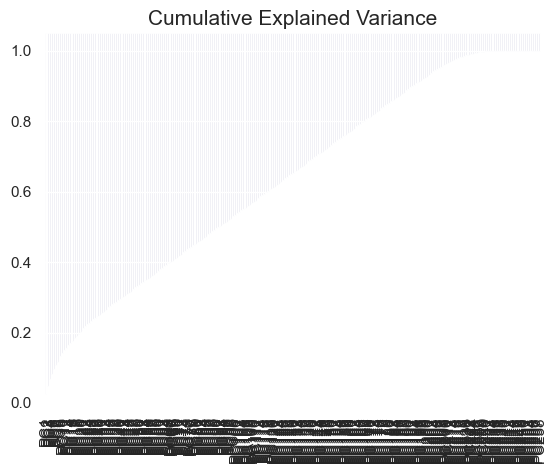

In [157]:
# plot Cumulative Explained Variance
explained_variances_cum = pd.Series(explained_variances).cumsum()
explained_variances_cum.index = ['PC' + str(x+1) for x in explained_variances_cum.index]
explained_variances_cum.plot(kind='bar')
plt.title('Cumulative Explained Variance', size=15);

In [158]:
# PCA data frame
hotel_pca = hotel_z[feats].dot(sorted_eigenvectors)  # project original data on the principal components
hotel_pca.columns = ['PC' + str(x+1) for x in hotel_pca.columns]  # rename columns
hotel_pca[['No.#']] = hotel_z[['No.#']]
hotel_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC250,PC251,PC252,PC253,PC254,PC255,PC256,PC257,PC258,No.#
2,-1.043882,1.743644,3.597238,2.355438,1.008215,-1.535136,-0.257465,-2.598177,-1.112684,-1.507343,...,0.105553,0.055295,0.244111,-0.302807,0.14067,0.084424,-0.013974,-0.00497,-0.056578,3
3,0.173164,0.793564,5.163778,1.916626,0.726760,1.895088,-2.306118,1.583642,-0.188132,-0.128052,...,0.105553,0.055295,0.244111,-0.302807,0.14067,0.084424,-0.013974,-0.00497,-0.056578,4
4,-0.554890,1.491581,0.862608,-0.554016,-0.813348,0.266346,-1.561268,0.260356,-1.844859,-0.394756,...,0.105553,0.055295,0.244111,-0.302807,0.14067,0.084424,-0.013974,-0.00497,-0.056578,5
5,-0.554890,1.491581,0.862608,-0.554016,-0.813348,0.266346,-1.561268,0.260356,-1.844859,-0.394756,...,0.105553,0.055295,0.244111,-0.302807,0.14067,0.084424,-0.013974,-0.00497,-0.056578,6
6,-1.856173,2.722819,1.799955,4.166288,1.587880,-3.045634,-0.076141,-1.665194,-1.395372,-2.489742,...,0.105553,0.055295,0.244111,-0.302807,0.14067,0.084424,-0.013974,-0.00497,-0.056578,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119173,-1.622450,0.887257,-0.464528,-1.552317,0.753610,0.949159,-0.228376,-0.736078,-1.365142,2.066305,...,0.105553,0.055295,0.244111,-0.302807,0.14067,0.084424,-0.013974,-0.00497,-0.056578,119174
119174,-2.951054,2.190851,-2.040585,-1.147071,1.059136,0.711767,1.399646,1.489437,1.536708,-0.626804,...,0.105553,0.055295,0.244111,-0.302807,0.14067,0.084424,-0.013974,-0.00497,-0.056578,119175
119175,-0.395026,-0.348096,1.122747,-3.769275,0.554105,-0.430621,-2.255310,-0.782229,0.038391,0.525010,...,0.105553,0.055295,0.244111,-0.302807,0.14067,0.084424,-0.013974,-0.00497,-0.056578,119176
119176,1.071397,-0.167565,2.971307,-1.190196,-1.746124,-2.207781,0.390983,0.581171,0.184908,1.070521,...,0.105553,0.055295,0.244111,-0.302807,0.14067,0.084424,-0.013974,-0.00497,-0.056578,119177


In [159]:
hotel_pca.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC250,PC251,PC252,PC253,PC254,PC255,PC256,PC257,PC258,No.#
count,101161.000000,101161.000000,101161.000000,101161.000000,101161.000000,101161.000000,101161.000000,101161.000000,101161.000000,101161.000000,...,1.011610e+05,1.011610e+05,1.011610e+05,1.011610e+05,1.011610e+05,1.011610e+05,1.011610e+05,1.011610e+05,1.011610e+05,101161.000000
mean,-0.097902,0.059457,0.116896,-0.074396,-0.039979,-0.043068,0.020643,0.008907,-0.017948,-0.018250,...,1.055529e-01,5.529532e-02,2.441110e-01,-3.028074e-01,1.406705e-01,8.442368e-02,-1.397385e-02,-4.969818e-03,-5.657849e-02,59851.486571
std,2.531558,2.323917,2.228506,1.972647,1.839810,1.647292,1.572661,1.520317,1.464794,1.394033,...,1.215829e-13,1.316411e-13,1.327672e-13,9.821845e-15,9.924389e-14,1.693486e-13,3.461920e-14,2.440771e-13,4.287799e-14,34781.274899
min,-7.245317,-6.332536,-8.828412,-4.690627,-19.567503,-7.853117,-6.965379,-11.040945,-8.009454,-11.160172,...,1.055529e-01,5.529532e-02,2.441110e-01,-3.028074e-01,1.406705e-01,8.442368e-02,-1.397385e-02,-4.969818e-03,-5.657849e-02,3.000000
25%,-1.911219,-1.652209,-1.408566,-1.710237,-1.104827,-0.954611,-1.167062,-0.596841,-0.795847,-0.645415,...,1.055529e-01,5.529532e-02,2.441110e-01,-3.028074e-01,1.406705e-01,8.442368e-02,-1.397385e-02,-4.969818e-03,-5.657849e-02,29854.000000
50%,-0.381200,-0.031540,0.048165,-0.115096,0.092579,-0.097009,0.016898,0.019531,-0.064077,-0.194080,...,1.055529e-01,5.529532e-02,2.441110e-01,-3.028074e-01,1.406705e-01,8.442368e-02,-1.397385e-02,-4.969818e-03,-5.657849e-02,58750.000000
75%,1.426304,1.870027,1.385144,1.329118,1.115220,0.911234,1.149659,0.663988,0.681199,0.295829,...,1.055529e-01,5.529532e-02,2.441110e-01,-3.028074e-01,1.406705e-01,8.442368e-02,-1.397385e-02,-4.969818e-03,-5.657849e-02,90720.000000
max,7.351527,9.147034,11.288544,9.714101,8.165126,9.148817,12.121139,10.608076,24.081398,16.559660,...,1.055529e-01,5.529532e-02,2.441110e-01,-3.028074e-01,1.406705e-01,8.442368e-02,-1.397385e-02,-4.969818e-03,-5.657849e-02,119178.000000


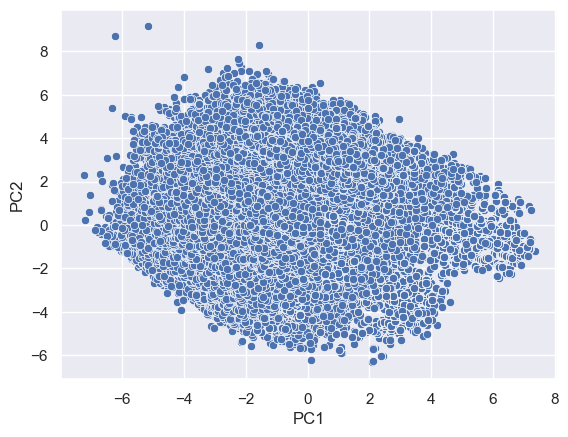

In [160]:
sns.scatterplot(
    data= hotel_pca,
    x='PC1',
    y='PC2',
);

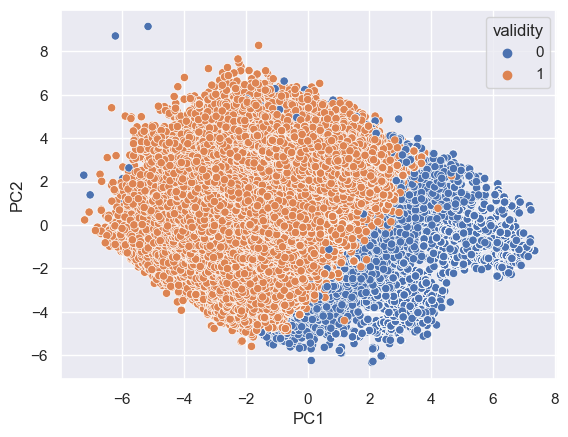

In [161]:
sns.scatterplot(
    data= hotel_pca,
    x='PC1',
    y='PC2',
    hue=hotel_clean['validity']
);

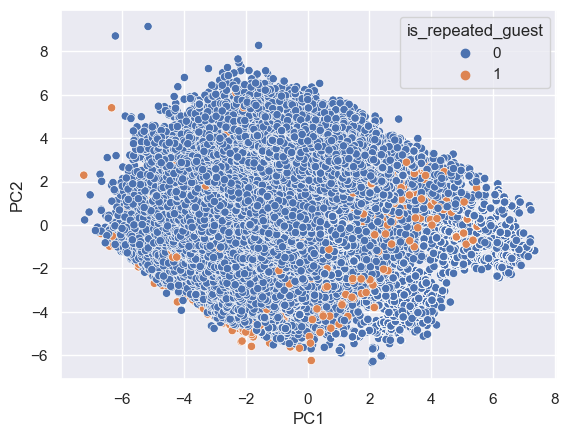

In [162]:
sns.scatterplot(
    data= hotel_pca,
    x='PC1',
    y='PC2',
    hue=hotel_clean['is_repeated_guest']
);

# Clustering

### K-Mean

In [163]:
hotel_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC250,PC251,PC252,PC253,PC254,PC255,PC256,PC257,PC258,No.#
2,-1.043882,1.743644,3.597238,2.355438,1.008215,-1.535136,-0.257465,-2.598177,-1.112684,-1.507343,...,0.105553,0.055295,0.244111,-0.302807,0.14067,0.084424,-0.013974,-0.00497,-0.056578,3
3,0.173164,0.793564,5.163778,1.916626,0.726760,1.895088,-2.306118,1.583642,-0.188132,-0.128052,...,0.105553,0.055295,0.244111,-0.302807,0.14067,0.084424,-0.013974,-0.00497,-0.056578,4
4,-0.554890,1.491581,0.862608,-0.554016,-0.813348,0.266346,-1.561268,0.260356,-1.844859,-0.394756,...,0.105553,0.055295,0.244111,-0.302807,0.14067,0.084424,-0.013974,-0.00497,-0.056578,5
5,-0.554890,1.491581,0.862608,-0.554016,-0.813348,0.266346,-1.561268,0.260356,-1.844859,-0.394756,...,0.105553,0.055295,0.244111,-0.302807,0.14067,0.084424,-0.013974,-0.00497,-0.056578,6
6,-1.856173,2.722819,1.799955,4.166288,1.587880,-3.045634,-0.076141,-1.665194,-1.395372,-2.489742,...,0.105553,0.055295,0.244111,-0.302807,0.14067,0.084424,-0.013974,-0.00497,-0.056578,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119173,-1.622450,0.887257,-0.464528,-1.552317,0.753610,0.949159,-0.228376,-0.736078,-1.365142,2.066305,...,0.105553,0.055295,0.244111,-0.302807,0.14067,0.084424,-0.013974,-0.00497,-0.056578,119174
119174,-2.951054,2.190851,-2.040585,-1.147071,1.059136,0.711767,1.399646,1.489437,1.536708,-0.626804,...,0.105553,0.055295,0.244111,-0.302807,0.14067,0.084424,-0.013974,-0.00497,-0.056578,119175
119175,-0.395026,-0.348096,1.122747,-3.769275,0.554105,-0.430621,-2.255310,-0.782229,0.038391,0.525010,...,0.105553,0.055295,0.244111,-0.302807,0.14067,0.084424,-0.013974,-0.00497,-0.056578,119176
119176,1.071397,-0.167565,2.971307,-1.190196,-1.746124,-2.207781,0.390983,0.581171,0.184908,1.070521,...,0.105553,0.055295,0.244111,-0.302807,0.14067,0.084424,-0.013974,-0.00497,-0.056578,119177


In [164]:
# select subset of data
hotel_subset = hotel_pca.set_index('No.#').loc[:, ['PC1', 'PC2']]
hotel_subset

,PC1,PC2
No.#,,
3,-1.043882,1.743644
4,0.173164,0.793564
5,-0.554890,1.491581
6,-0.554890,1.491581
7,-1.856173,2.722819
...,...,...
119174,-1.622450,0.887257
119175,-2.951054,2.190851
119176,-0.395026,-0.348096


In [165]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(hotel_subset)
kmeans.labels_

array([0, 0, 0, ..., 1, 0, 1])

In [166]:
pd.Series(kmeans.labels_).value_counts(normalize=True)

1    0.546624
0    0.453376
dtype: float64

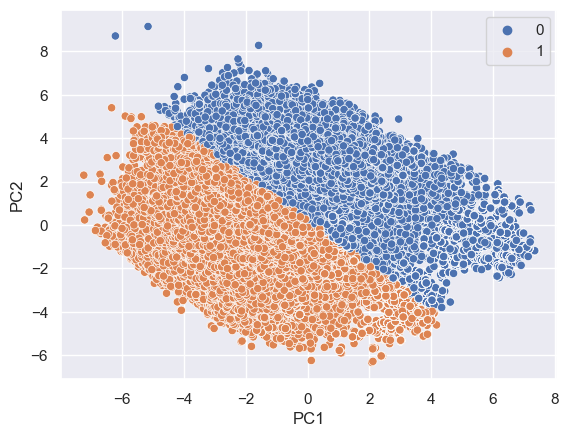

In [167]:
sns.scatterplot(
    x=hotel_subset['PC1'],
    y=hotel_subset['PC2'],
    hue=kmeans.labels_
);

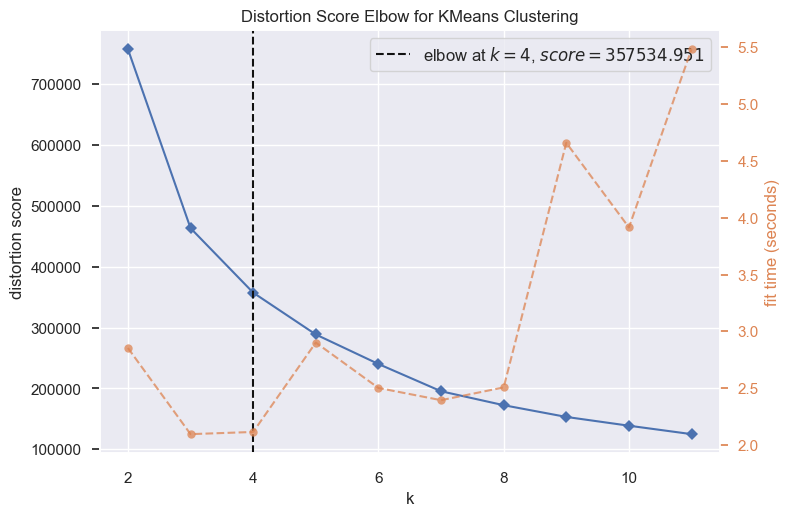

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [197]:
kmeans = KElbowVisualizer(KMeans(), k=11)
kmeans.fit(hotel_subset)
kmeans.show()

In [198]:
kmeans_fit = KMeans(n_clusters=4, random_state=0)
clr = kmeans_fit.fit_predict(hotel_subset)
# fit model to market_pca
hotel_subset['Cluster No.'] = clr
# fit model to market_clean
hotel_subset['Cluster No.'] = clr
hotel_subset.head()

,PC1,PC2,Cluster No.
No.#,,,
3,-1.043882,1.743644,1
4,0.173164,0.793564,3
5,-0.554890,1.491581,3
6,-0.554890,1.491581,3
7,-1.856173,2.722819,1


In [199]:
pd.Series(kmeans_fit.labels_).value_counts(normalize=True)

0    0.343986
3    0.302310
1    0.205079
2    0.148624
dtype: float64

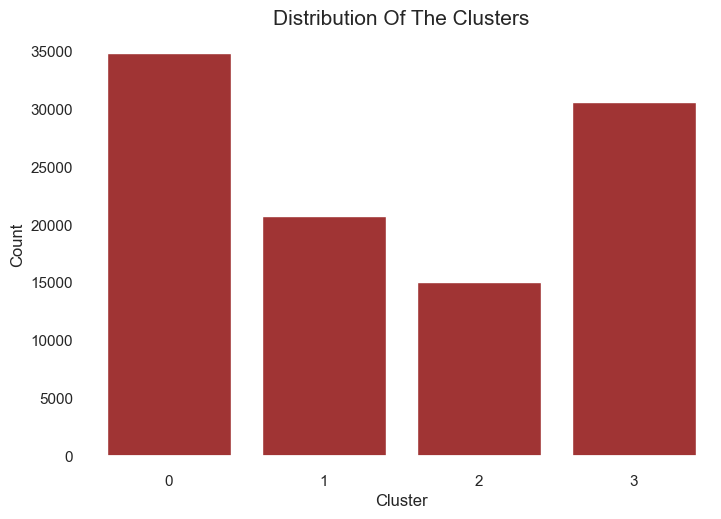

In [200]:
plt.axes().set_facecolor("white")
pl = sns.countplot(
    x=hotel_subset['Cluster No.'],
    palette = ['firebrick']
)
pl.set_title("Distribution Of The Clusters", fontsize = 15)
pl.set_xlabel("Cluster")
pl.set_ylabel("Count")
plt.savefig('save.png', bbox_inches='tight')
plt.show()

# Split Data

In [214]:
hotel_clean['No.#']

2              3
3              4
4              5
5              6
6              7
           ...  
119173    119174
119174    119175
119175    119176
119176    119177
119177    119178
Name: No.#, Length: 101161, dtype: int64

In [284]:
hotel_clean = hotel_clean['arrival_date'].sort_index()

In [265]:
train=hotel_clean.loc[lambda df: df['arrival_date']<= '2016-06-30']
test=hotel_clean.loc[lambda df: df['arrival_date']> '2016-06-30']
print(train.shape)
print(test.shape)

(68349, 261)
(32812, 261)


# Model

### KNN

In [266]:
train[feat].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68349 entries, 2 to 103762
Columns: 251 entries, hotel_City Hotel to is_repeated_guest
dtypes: float64(4), int32(1), int64(24), uint8(222)
memory usage: 29.9 MB


In [267]:
hotel_z['No.#']

2              3
3              4
4              5
5              6
6              7
           ...  
119173    119174
119174    119175
119175    119176
119176    119177
119177    119178
Name: No.#, Length: 101161, dtype: int64

In [268]:
# Creat a KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=10)

# Train the model using the training set
knn_model.fit(train[feat], train[label_col])
# Predict on test data
knn_predict = knn_model.predict(test[feat])

c:\Users\USER\Pictures\Camera Roll\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [269]:
knn_cm = confusion_matrix(test[label_col], knn_predict)
knn_cm = pd.DataFrame(knn_cm, index=['True 0', 'True 1'], columns=['Predict 0', 'Predict 1'])
knn_cm

,Predict 0,Predict 1
True 0,5145,5949
True 1,2068,19650


In [270]:
recall = recall_score(test[label_col], knn_predict)
precision = precision_score(test[label_col], knn_predict)
accuracy = accuracy_score(test[label_col], knn_predict)
print(f"Recal: {recall}")
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")

Recal: 0.9047794456211438
Precision: 0.7676081096917848
Accuracy: 0.755668657808119


# SVM

In [271]:
# Create a svm Classifier
svm_model = svm.SVC(kernel='linear') # Linear Kernel

# Train the model using the training set
svm_model.fit(train[feat], train[label_col])

# Predict on test data
svm_predict = svm_model.predict(test[feat])

In [272]:
svm_cm = confusion_matrix(test[label_col], svm_predict)
svm_cm = pd.DataFrame(svm_cm, index=['True 0', 'True 1'], columns=['Predict 0', 'Predict 1'])
svm_cm

,Predict 0,Predict 1
True 0,11094,0
True 1,0,21718


In [273]:
recall = recall_score(test[label_col], svm_predict)
precision = precision_score(test[label_col], svm_predict)
accuracy = accuracy_score(test[label_col], svm_predict)
print(f"Recal: {recall}")
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")

Recal: 1.0
Precision: 1.0
Accuracy: 1.0


# Decision tree

In [274]:
# Create Decision Tree classifer object
tree_model = DecisionTreeClassifier()

# Train the model using the training set
tree_model.fit(train[feat], train[label_col])

# Predict on test data
tree_predict = tree_model.predict(test[feat])

In [275]:
tree_cm = confusion_matrix(test[label_col], tree_predict)
tree_cm = pd.DataFrame(tree_cm, index=['True 0', 'True 1'], columns=['Predict 0', 'Predict 1'])
tree_cm

,Predict 0,Predict 1
True 0,11094,0
True 1,0,21718


In [276]:
recall = recall_score(test[label_col], tree_predict)
precision = precision_score(test[label_col], tree_predict)
accuracy = accuracy_score(test[label_col], tree_predict)
print(f"Recal: {recall}")
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")

Recal: 1.0
Precision: 1.0
Accuracy: 1.0


# IMPROVE

In [277]:
#Create a Gaussian Classifier
forest_model = RandomForestClassifier(n_estimators=100)

# Train the model using the training set
forest_model.fit(train[feat], train[label_col])

# Predict on test data
forest_predict = forest_model.predict(test[feat])

In [278]:
forest_cm = confusion_matrix(test[label_col], forest_predict)
forest_cm = pd.DataFrame(forest_cm, index=['True 0', 'True 1'], columns=['Predict 0', 'Predict 1'])
forest_cm

,Predict 0,Predict 1
True 0,11088,6
True 1,0,21718


In [279]:
recall = recall_score(test[label_col], forest_predict)
precision = precision_score(test[label_col], forest_predict)
accuracy = accuracy_score(test[label_col], forest_predict)
print(f"Recal: {recall}")
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")

Recal: 1.0
Precision: 0.9997238077702081
Accuracy: 0.9998171400707059


# FEATURE IMPORTANCE

In [261]:
pd.Series(index=feat, data=forest_model.feature_importances_).sort_values(ascending=False)  # forest

is_canceled                     0.227409
reservation_status_Canceled     0.200987
reservation_status_Check-Out    0.171620
real_stay_days                  0.105591
deposit_type_Non Refund         0.047372
                                  ...   
country_PAK                     0.000000
country_PAN                     0.000000
country_PER                     0.000000
country_PHL                     0.000000
country_NGA                     0.000000
Length: 251, dtype: float64

In [262]:
pd.Series(index=feat, data=tree_model.feature_importances_).sort_values(ascending=False)  # tree

reservation_status_Check-Out    9.995786e-01
number_of_day_stays             2.106962e-04
arrival_date_week_number        2.101184e-04
stays_in_week_nights            6.132731e-07
hotel_City Hotel                0.000000e+00
                                    ...     
country_JAM                     0.000000e+00
country_JEY                     0.000000e+00
country_JOR                     0.000000e+00
country_JPN                     0.000000e+00
is_repeated_guest               0.000000e+00
Length: 251, dtype: float64

In [263]:
pd.Series(index=feat, data=svm_model.coef_[0]).sort_values(ascending=False)  # svm

reservation_status_Check-Out      1.902700
reservation_month                 0.632079
assigned_room_type_D              0.271430
booking_changes                   0.206967
previous_bookings_not_canceled    0.110408
                                    ...   
assigned_room_type_E             -0.262401
previous_cancellations           -0.584570
reservation_status_No-Show       -0.947860
reservation_status_Canceled      -0.954839
is_canceled                      -1.902700
Length: 251, dtype: float64